# SDLS and CGLS on MNIST data

Running SDLS and CGLS on the MNIST data.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np
import os
import pathlib
import random
import struct

home_dir = "/c/Users/thsiao3/Documents/emory_class/MATH789/hw2"
home_dir = pathlib.Path(home_dir)
os.chdir(home_dir)

import gradientLeastSquares as GLS

Setting up MNIST data

In [2]:
# Read in images
def read_idx(filename):
    with open(filename, 'rb') as f:
        dims = struct.unpack('>HBB', f.read(4))[2]
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.fromstring(f.read(), dtype=np.uint8).reshape(shape)

# Data Preprocessing
train_images = read_idx("train-images-idx3-ubyte")
train_labels = read_idx("train-labels-idx1-ubyte")
test_images = read_idx("t10k-images-idx3-ubyte")
test_labels = read_idx("t10k-labels-idx1-ubyte")

# Grab dimensions
n_c = len(np.unique(test_labels))
n_train = train_images.shape[0]
n_test = test_images.shape[0]

# Turn each of the 60000 flattened into an array. so 2D array
# The grid was reshaped so that the vector starts from the top row, goes across
# towards the right, then moves on to the next row below. So x-axis tiles, y-axis
# repeats, and the y's go in reverse numerical order. 
train_data = np.reshape(train_images, (n_train, 28**2))
test_data = np.reshape(test_images, (n_test, 28**2))

# Add the biases vector to train and test data
ones_train = np.ones((n_train,1))
ones_test = np.ones((n_test, 1))
train_data = np.hstack((ones_train, train_data))
test_data = np.hstack((ones_test, test_data))

# Create C matrix for labels
Y = train_data
C = np.zeros((n_c, n_train))
for i in np.arange(n_train):
    C[train_labels[i], i] = 1

# Creating the initial guesses
X = np.zeros((785, n_c))

/home/thsiao3/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


In [3]:
#Wsd, hissd, X_allsd = GLS.SDLS(A=Y,B=C.T, X=X, maxIter=50)
Wcg, hiscg, X_allcg = GLS.CGLS(A=Y,B=C.T, X=X, maxIter=50)

In [4]:
def compute_error(W):
    C_train = train_data @ W
    C_test = test_data @ W
    train_predict = np.apply_along_axis(func1d=np.argmax, axis=1, arr=C_train)
    test_predict = np.apply_along_axis(func1d=np.argmax, axis=1, arr=C_test)
    test_acc = np.round(np.mean(test_predict == test_labels), 4)
    train_acc = np.round(np.mean(train_predict == train_labels), 4)
    return 1-train_acc, 1-test_acc

In [5]:
train_errors = np.zeros(50)
test_errors = np.zeros(50)
for i in range(50):
    train_errors[i], test_errors[i] = compute_error(X_allsd[:,:,i])
titles = ["Loss function", "Train error", "Test Error"]
data = [hissd, train_errors, test_errors]

NameError: name 'X_allsd' is not defined

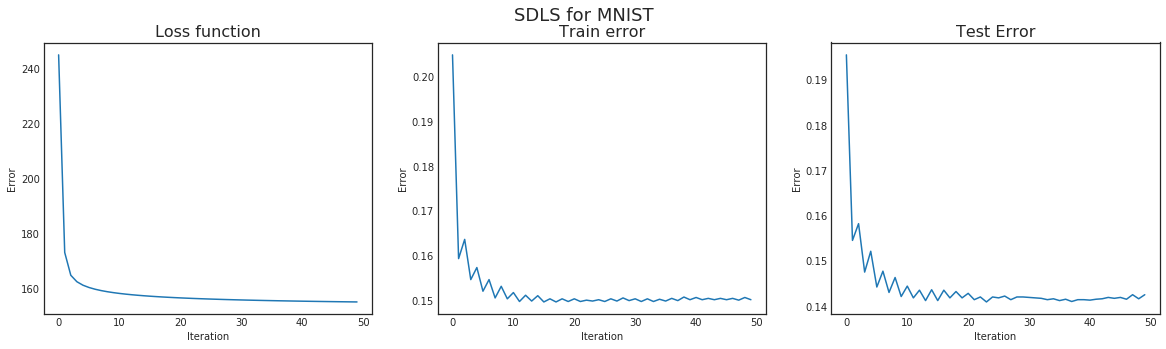

In [6]:
f = plt.figure(figsize=(20, 5))
f.suptitle('SDLS for MNIST', fontsize=18)
for k in range(3):
    ax = f.add_subplot(1, 3, k+1)
    plt.plot(data[k])
    plt.xlabel("Iteration")
    plt.ylabel("Error")
    ax.set_title("{}".format(titles[k]), fontsize=16)

In [ ]:
train_errors_cg = np.zeros(50)
test_errors_cg = np.zeros(50)
for i in range(50):
    train_errors_cg[i], test_errors_cg[i] = compute_error(X_allcg[:,:,i])
titles = ["Loss function", "Train error", "Test Error"]
data = [hiscg, train_errors_cg, test_errors_cg]

I think there's something wrong with my implementation of CGLS for multiple right hand sides.

In [ ]:
f = plt.figure(figsize=(20, 5))
f.suptitle('CGLS for MNIST', fontsize=18)
for k in range(3):
    ax = f.add_subplot(1, 3, k+1)
    plt.plot(data[k])
    plt.xlabel("Iteration")
    plt.ylabel("Error")
    ax.set_title("{}".format(titles[k]), fontsize=16)